# Redes Neuronales Artificiales & Deep Learning

## Objetivos de este curso

- **Conocer, entender y aplicar algunos modelos clásicos de Redes Neuronales Artificiales**, y algunas habilidades útiles en la práctica.
- **Conocer los conceptos básicos del Aprendizaje Profundo y aplicar las herramientas para desarrollar aplicaciones de machine learning**.
- **Aprender a utilizar los modelos de Deep Learning de Keras con la biblioteca Scikit-Learn de Python**, y evaluar los modelos de Keras utilizando la validación cruzada en scikit-learn (la biblioteca scikit-learn es la biblioteca más popular para Machine Learning en Python).
- **Identificar el tipo de red neuronal más adecuado para cada problema**, y las limitaciones de cada arquitectura.
- **Presentar a Python como herramienta de simulación de Redes Neuronales Artificiales**, y el ambiente de trabajo del curso!!!

## Schedule:

- Comenzando...
- Introducción
- Perceptrón
- Redes neuronales estáticas
- Redes recurrentes y mapas auto-organizados
- Memorias asociativas y Redes de funcion de base radial
- Introducción a las bibliotecas de aprendizaje profundo
- Modelos de regresión con Keras
- Modelos de clasificación con Keras
- Redes neuronales convolucionales (CNN)
- Redes neuronales recurrentes (RNN)

### Nota!!!!

Recuerde mantener actualizadas sus librerias!!!! (imutils es una libreria para operaciones básicas de procesamiento de imágenes como rotación, redimensionamiento, esqueletización,...)

    pip3 install --upgrade imutils
    pip3 install --upgrade scikit-learn
    pip3 install --upgrade matplotlib

## Redes neuronales convolucionales (CNN)

En este segundo artículo vamos a pasar de una red neuronal sencilla a una red convolucional. Keras permite hacerlas de forma muy sencilla y básicamente, todo lo demás para medir la calidad de los modelos entrenados se hace de la misma forma.

Una **red neuronal convolucional (CNN o ConvNet)** es un tipo de red neuronal artificial donde las **neuronas corresponden a campos receptivos** de una manera muy similar a las neuronas en la corteza visual primaria (V1) de un cerebro biológico. Este tipo de red es una variación de un perceptron multicapa, sin embargo, debido a que su aplicación es realizada en matrices bidimensionales, son muy efectivas para tareas de visión artificial, como en la clasificación y segmentación de imágenes, entre otras aplicaciones. 

Las redes neuronales convolucionales son similares a las redes neuronales multicanal, su principal ventaja es que cada parte de la red se le entrena para realizar una tarea, esto reduce significativamente el número de capas ocultas, por lo que el entrenamiento es más rápido. Además, presenta invarianza a la traslación de los patrones a identificar.

Los perceptrones multicapa son redes totalmente conectadas, es decir, cada neurona de una capa está conectada a todas las neuronas de la siguiente capa. Esta *conexión completa* hace propensas a las redes a sobreajustar los datos. Las CNN son formas simplificadas de las multicapa en las que se agrega alguna forma de medición de magnitud de pesos a la función de pérdida. Además, aprovechan el patrón jerárquico de los datos y ensamblan patrones más complejos utilizando patrones más pequeños y simples. Por lo tanto, en la escala de conectividad y complejidad, las CNNs se encuentran en el extremo inferior. 

Las redes neuronales convolucionales son muy potentes para todo lo que tiene que ver con el análisis de imágenes, debido a que son capaces de detectar características simples como por ejemplo detención de bordes, lineas, etc y componer en características más complejas hasta detectar lo que se busca.

Una **convolución** es un operador matemático que transforma dos funciones $f$ y $g$ en una tercera función que en cierto sentido representa la magnitud en la que se superponen $f$ y una versión trasladada e invertida de $g$.

### Arquitectura

Una red neuronal convolucional es una red multicapa que consta de capas convolucionales y de reducción alternadas, y al finalmente tiene capas de conexión total como una red perceptrón multicapa. 

In [0]:
from IPython.display import Image
Image(filename='./drive/Colab Notebooks/img2/din_fig16.png')

En la convolución se realizan operaciones de **productos y sumas entre la capa de partida y los n filtros (o kernel) que genera un mapa de características**. Los características extraídas corresponden a cada posible ubicación del filtro en la imagen original. 

La ventaja es que el mismo filtro (= neurona) sirve para extraer la misma característica en cualquier parte de la entrada, con esto que consigue reducir el número de conexiones y el número de parámetros a entrenar en comparación con una red multicapa de conexión total.

In [0]:
from IPython.display import Image
Image(filename='img2/din_fig17.png')

Después de aplicar la convolución se le aplica a los mapas de características una **función de activación**. La función de activación recomendada es **sigmoide ReLU**, seleccionando una tasa de aprendizaje adecuada y monitorizar la fracción de neuronas muertas, también se puede podría probar con **Leaky ReLu** o **Maxout**, pero **nunca utilizar sigmoide logística**.

### Reducción (pooling)

En la reducción **se disminuye la cantidad de parámetros** al quedarse con las características más comunes. La forma de reducir parámetros **se realiza mediante la extracción de estadísticas como el promedio o el máximo de una región** fija del mapa de características, al reducir características el método pierde precisión aunque mejora su compatibilidad.

In [0]:
from IPython.display import Image
Image(filename='img2/din_fig18.png')

### Clasificador (red perceptrón multicapa)

El final de las capas convolucional y de reducción, se suele utilizar capas completamente conectadas en la que cada pixel se considera como una neurona separada al igual que en un perceptrón multicapa. La última capa de esta red es una capa clasificadora que tendrá tantas neuronas como el número de clases a predecir.

In [0]:
from IPython.display import Image
Image(filename='img2/din_fig19.png')

A fin de comparar desempeños, realizaremos el mismo experimento de clasificacion de imagenes cambiando el modelo utilizado: de una red neuronal neuronal estatica multicapa completamente conectada (tradicional) a una red convolutiva.

In [0]:
from IPython.display import Image
Image(filename='img2/din_fig20.png')

### Importando las librerías necesarias

In [3]:
import numpy as np
from scipy import misc  
from PIL import Image  
import glob  
import matplotlib.pyplot as plt  
import scipy.misc  
from matplotlib.pyplot import imshow  
%matplotlib inline
from IPython.display import SVG  
import cv2  
import seaborn as sn  
import pandas as pd  
import pickle  
from keras import layers  
from keras.layers import Flatten, Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout  
from keras.models import Sequential, Model, load_model  
from keras.preprocessing import image  
from keras.preprocessing.image import load_img  
from keras.preprocessing.image import img_to_array  
from keras.applications.imagenet_utils import decode_predictions  
from keras.utils import layer_utils, np_utils  
from keras.utils.data_utils import get_file  
from keras.applications.imagenet_utils import preprocess_input  
from keras.utils.vis_utils import model_to_dot  
from keras.utils import plot_model  
from keras.initializers import glorot_uniform  
from keras import losses  
import keras.backend as K  
from keras.callbacks import ModelCheckpoint  
from sklearn.metrics import confusion_matrix, classification_report  
import tensorflow as tf

Using TensorFlow backend.


### Preparando el conjunto de datos

Como antes, usaremos el conjunto de datos CIFAR-100, que, como ya dijimos, consta de 600 imágenes por cada clase de un total de 100 clases. Se divide en 500 imágenes para entrenamiento y 100 imágenes para validación por cada clase. Las 100 clases están agrupadas en 20 superclases. Cada imagen tiene una etiqueta *fina* (la clase, de entre las 100, a la que pertenece) y una etiqueta *gruesa* (correspondiente a su superclase):

In [0]:
from keras.datasets import cifar100

(x_train_original, y_train_original), (x_test_original, y_test_original) = cifar100.load_data(label_mode='fine')

Como antes hasta este punto hemos descargado los datasets de entrenamiento y validación. *x_train_original* y *x_test_original* son los conjuntos de datos con lás imágenes de entrenamiento y validación respectivamente, mientras que *y_train_original* y *y_test_original* son los datasets con las etiquetas.

Veíamos que la forma de *y_train_original* era la siguiente:

In [5]:
y_train_original.shape

(50000, 1)

In [6]:
y_train_original

array([[19],
       [29],
       [ 0],
       ...,
       [ 3],
       [ 7],
       [73]])

Así que, inicialmente, había que convertirlo en su versión **one-hot-encoding**:

In [0]:
y_train = np_utils.to_categorical(y_train_original, 100)
y_test = np_utils.to_categorical(y_test_original, 100)

In [8]:
y_train.shape

(50000, 100)

In [9]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

El siguiente paso era ver los datos de entrenamiento (x_train_original):

In [10]:
x_train_original.shape

(50000, 32, 32, 3)

In [11]:
x_train_original[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [195, 205, 193],
        [212, 224, 204],
        [182, 194, 167]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [170, 176, 150],
        [161, 168, 130],
        [146, 154, 113]],

       [[255, 255, 255],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [189, 199, 169],
        [166, 178, 130],
        [121, 133,  87]],

       ...,

       [[148, 185,  79],
        [142, 182,  57],
        [140, 179,  60],
        ...,
        [ 30,  17,   1],
        [ 65,  62,  15],
        [ 76,  77,  20]],

       [[122, 157,  66],
        [120, 155,  58],
        [126, 160,  71],
        ...,
        [ 22,  16,   3],
        [ 97, 112,  56],
        [141, 161,  87]],

       [[ 87, 122,  41],
        [ 88, 122,  39],
        [101, 134,  56],
        ...,
        [ 34,  36,  10],
        [105, 133,  59],
        [138, 173,  79]]

Representa la imagen en los 3 canales RGB de 256 píxeles. Nuevamente vamos a ver una, la última por ejemplo:

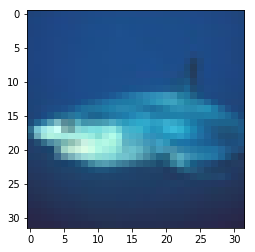

In [12]:
imgplot = plt.imshow(x_train_original[49999])
plt.show()

Lo que hacíamos a continuación, era normalizar las imágenes dividiéndo cada elemento por el numero de píxeles, es decir, 255. Con lo que obteníamos el array con valores de entre 0 y 1:

In [0]:
x_train = x_train_original/255.0
x_test = x_test_original/255.0

In [14]:
x_train.shape

(50000, 32, 32, 3)

In [15]:
x_train[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.76470588, 0.80392157, 0.75686275],
        [0.83137255, 0.87843137, 0.8       ],
        [0.71372549, 0.76078431, 0.65490196]],

       [[1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.66666667, 0.69019608, 0.58823529],
        [0.63137255, 0.65882353, 0.50980392],
        [0.57254902, 0.60392157, 0.44313725]],

       [[1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843],
        [1.        , 1.        , 1.        ],
        ...,
        [0.74117647, 0.78039216, 0.6627451 ],
        [0.65098039, 0.69803922, 0.50980392],
        [0.4745098 , 0.52156863, 0.34117647]],

       ...,

       [[0.58039216, 0.7254902 , 0.30980392],
        [0.55686275, 0.71372549, 0.22352941],
        [0.54901961, 0

### Preparando el entorno

Especificábamos la situación de los canales de las imágenes y la fase del experimento. Nuevamente especificar a Keras dónde se encuentran los canales. En un array de imagenes, pueden venir como último indice o como el primero. Esto se conoce como canales primero (*channels firs*t) o canales al final (*channels last*). En nuestro caso, vamos a definirlos al final. El parámetro *image_data_format* afecta la forma en que cada uno de los frameworks trata las dimensiones de los datos. Específicamente, define dónde está la dimensión de los canales en los datos de entrada. Para Tensorflow o CNTK debe ser *channels_last*, para Theano debería ser *channels_first*.

In [16]:
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

W0704 23:06:41.184774 140224084977536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:153: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



### Arquitectura de la red: Red neuronal convolucional

En este paso, vamos a definir el modelo de red convolucional. Nuevamente utilizamos la API *Sequential* para crear el modelo, ya que la red es de nuevo una pila secuencial de capas. Sin embargo, esta vez utilizamos la instrucción *Conv2D* para crear capas convolucionales bi-dimensionales (para imagenes). Otras instrucciones disponibles son: 
- *Conv1D* (convolución temporal, una única dimensión)
- *SeparableConv1D* (convoluciones separables)
- *SeparableConv2D*
- *DepthwiseConv2D* (realiza sólo el primer paso de una convolución espacial profunda)
- *Conv2DTranspose* (transformación en dirección opuesta a la convolución normal)
- *Conv3D*
- *Conv3DTranspose*
- *Cropping1D* (recorta a lo largo del tiempo)
- *Cropping2D*
- *Cropping3D*
- *UpSampling1D* (repite cada paso temporal *size* veces a lo largo del eje de tiempo)
- *UpSampling2D*
- *UpSampling3D*
- *ZeroPadding1D* (capa de relleno con ceros)
- *ZeroPadding2D*
- *ZeroPadding3D*

Los parámetros de *Conv2D* son (los mas importantes!!!):
- *filters*: Entero, la dimensionalidad del espacio de salida (es decir, el número de filtros de salida en la convolución).
- *kernel_size*: Un entero o tupla/lista de 2 enteros, especificando la altura y el ancho de la ventana de convolución 2D. Puede ser un solo entero para especificar el mismo valor para todas las dimensiones espaciales.
- *activation*: Función de activación a utilizar. Si no se especifica nada, no se aplica ninguna activación (es decir, activación lineal: a(x) = x).
- *dilation_rate*: un número entero o tupla/lista de 2 números enteros, especificando la tasa de dilatación a utilizar para la convolución dilatada. Puede ser un solo entero para especificar el mismo valor para todas las dimensiones espaciales. Actualmente, especificar cualquier valor de tasa de dilatación != 1 es incompatible con especificar cualquier valor de *stride* != 1 (zancada o paso).
- *strides*: Un número entero o tupla/lista de 2 números enteros, especificando los pasos de la convolución a lo largo de la altura y el ancho. Puede ser un solo entero para especificar el mismo valor para todas las dimensiones espaciales. La especificación de cualquier valor de *strides* != 1 es incompatible con la especificación de cualquier valor de *dilation_rate* != 1.
- *padding* (relleno): uno de '*valid*' o '*same*' (insensible a mayúsculas y minúsculas). Tenga en cuenta que '*same*' es ligeramente inconsistente strides != 1.
- *kernel_initializer*: Inicializador para la matriz de pesos del kernel.

In [0]:
def create_simple_cnn():
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu'))
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
  model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))

  model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(1024, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(100, activation='softmax'))

  return model

Para las capas de reducción (pooling) utilizamos la instrucción *MaxPooling2D* que realiza la reducción sobre datos bi-dimensionales. Otras instrucciones de reducción son:
- *MaxPooling1D*
- *MaxPooling3D*
- *AveragePooling1D* (reducción con ventana promedio)
- *AveragePooling2D*
- *AveragePooling3D*
- *GlobalMaxPooling1D* (maximo global)
- *GlobalAveragePooling1D* (promedio global)
- *GlobalMaxPooling2D*
- *GlobalAveragePooling2D*
- *GlobalMaxPooling3D*
- *GlobalAveragePooling3D*

Los parámetros de *MaxPooling2D* son:
- *pool_size*: número entero o tupla de 2 números enteros, factores por los cuales se puede reducir la escala (vertical, horizontal). (2, 2) reducirá a la mitad la entrada en ambas dimensiones espaciales. Si sólo se especifica un número entero, se utilizará la misma longitud de ventana para ambas dimensiones.
- *strides*: Entero, tupla de 2 enteros, o None. Valores de avance (paso o zancada). Si es None, por defecto será pool_size.
- *padding* (relleno): Uno de entre 'valid' o 'same' (insensible a mayúsculas y minúsculas).
- *data_format*: Una cadena, una de *channels_last* (por defecto) o *channels_first*. El orden de las dimensiones de las entradas.

Como se puede ver en el código, la instrucción *Conv2D* introduce una capa convolucional y la instrucción *MaxPooling*, la capa de pooling (en esta red hemos realizado *max-pooling*, pero podíamos haber usado otras como *average-pooling*). Para cada convolución usamos como función de activación ReLu. Otra instrucción nueva es *Dropout*, con la que hacemos la función de regularización, el *Dropout* consiste en establecer aleatoriamente una tasa de fracción de unidades de entrada a 0 en cada actualización durante el tiempo de entrenamiento, lo que ayuda a prevenir el overfitting.

Una vez definido el modelo, lo compilamos especificando la función de optimización, la de coste o pérdida y las métricas que usaremos. En este caso, como en el anterior, usaremos la función de optimización stochactic gradient descent, la función de pérdida categorical cross entropy y, para las métricas, accuracy y mse (media de los errores cuadráticos).

In [18]:
scnn_model = create_simple_cnn()
scnn_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc', 'mse'])

W0704 23:06:51.639209 140224084977536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0704 23:06:51.647957 140224084977536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0704 23:06:51.688597 140224084977536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0704 23:06:51.791691 140224084977536 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please us

Una vez hecho esto, vamos a ver un resumen del modelo creado:

In [19]:
scnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 256)       295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 512)         1180160   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 512)         0         
__________

Podemos ver que hemos doblado el número de parámetros. Si hubiésemos usado una red neuronal tradicional para lo que vamos a realizar, el número de parámetros hubiera crecido demasiado. Con el paso de la convolución, lo que va a hacer el modelo será extraer parámetros de la imagen.

Ahora sólo queda entrenar, para ello, haremos lo siguiente:

In [20]:
scnn = scnn_model.fit(x=x_train, y=y_train, batch_size=32, epochs=10, verbose=1, validation_data=(x_test, y_test), shuffle=True)

W0704 23:06:59.762474 140224084977536 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0704 23:06:59.902542 140224084977536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 71s 1ms/step - loss: 4.6015 - acc: 0.0126 - mean_squared_error: 0.0099 - val_loss: 4.5901 - val_acc: 0.0186 - val_mean_squared_error: 0.0099
Epoch 2/10
50000/50000 [==============================] - 64s 1ms/step - loss: 4.4586 - acc: 0.0285 - mean_squared_error: 0.0099 - val_loss: 4.3182 - val_acc: 0.0377 - val_mean_squared_error: 0.0098
Epoch 3/10
50000/50000 [==============================] - 64s 1ms/step - loss: 4.2008 - acc: 0.0579 - mean_squared_error: 0.0098 - val_loss: 4.1175 - val_acc: 0.0722 - val_mean_squared_error: 0.0097
Epoch 4/10
50000/50000 [==============================] - 62s 1ms/step - loss: 3.9902 - acc: 0.0915 - mean_squared_error: 0.0097 - val_loss: 4.0243 - val_acc: 0.0868 - val_mean_squared_error: 0.0097
Epoch 5/10
50000/50000 [==============================] - 64s 1ms/step - loss: 3.8220 - acc: 0.1179 - mean_squared_error: 0.0095 - val_loss: 3.7728 - val_

Le decimos a Keras que queremos usar para entrenar el dataset imágenes normalizadas de entrenamiento con el array de etiquetas one-hot-encoding. Usaremos batches o bloques de 32 (reduciendo la necesidad de memoria) y daremos 10 vueltas completas (o epochs). Usaremos los datos para validar *x_test* e *y_test*. El proceso de entrenamiento lo iremos viendo a continuación hasta terminar. El resultado del entrenamiento se guarda en la variable *scnn*, de la cual, extraeremos el histórico de los datos del entrenamiento.

Como se puede ver, las instrucciones tras el metodo que define el modelo son exactamente iguales:

Al igual que antes, aunque hemos evaluado durante el entrenamiento, podríamos evaluarlo frente a otro dataset.

In [21]:
scnn_evaluation = scnn_model.evaluate(x=x_test, y=y_test, batch_size=32, verbose=1)
scnn_evaluation # Las metricas mostradas son: 'loss', 'acc', 'mean_squared_error'

10000/10000 [==============================] - 2s 164us/step


[3.262318660736084, 0.2225, 0.008909417736530303]

Veamos las métricas obtenidas para el entrenamiento y validación gráficamente (para ello usamos la librería matplotlib):

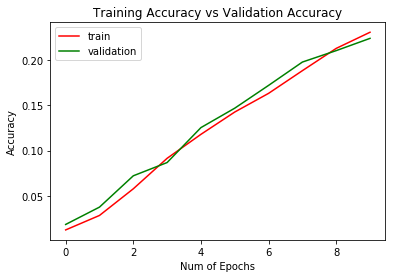

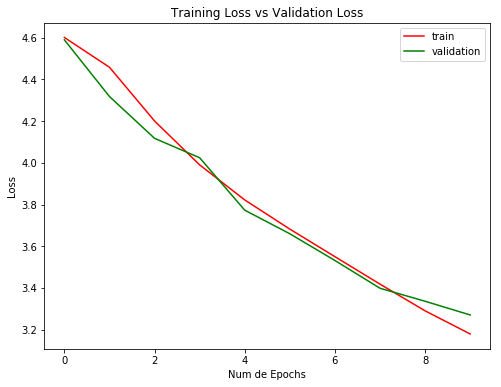

In [22]:
plt.figure(0)
plt.plot(scnn.history['acc'],'r')  
plt.plot(scnn.history['val_acc'],'g')  
plt.xticks(np.arange(0, 10, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])

plt.figure(1)  
plt.plot(scnn.history['loss'],'r')  
plt.plot(scnn.history['val_loss'],'g')  
plt.xticks(np.arange(0, 10, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num de Epochs")  
plt.ylabel("Loss")  
plt.title("Training Loss vs Validation Loss")  
plt.legend(['train','validation'])

plt.show()

La generalización es mejor que la red sencilla ya que, a diferencia del 4% de la red sencilla, éste tiene un 2% que, ni mucho menos, es un buen resultado.

### Matriz de confusión

Una vez que hemos entrenado el modelo, vamos a ver otras métricas. Para ello, crearemos la matriz de confusión con SciKit Learn y, a partir de ella, veremos las métricas precission, recall y F1-score.

Vamos a hacer una predicción sobre el dataset de validación y, a partir de ésta, generamos la matriz de confusión y mostramos las métricas mencionadas anteriormente:

In [23]:
scnn_pred = scnn_model.predict(x_test, batch_size=32, verbose=1)  
scnn_predicted = np.argmax(scnn_pred, axis=1)

10000/10000 [==============================] - 2s 152us/step


Como ya hicimos en la primera parte, vamos a dar como predicha el mayor valor de la predicción. Lo normal es dar un valor mínimo o bias que defina un resultado como positivo, pero en este caso, lo vamos a hacer simple.

Con la librería Scikit Learn, generamos la matriz de confusión y la dibujamos (aunque el gráfico no es muy bueno debido al numero de etiquetas):

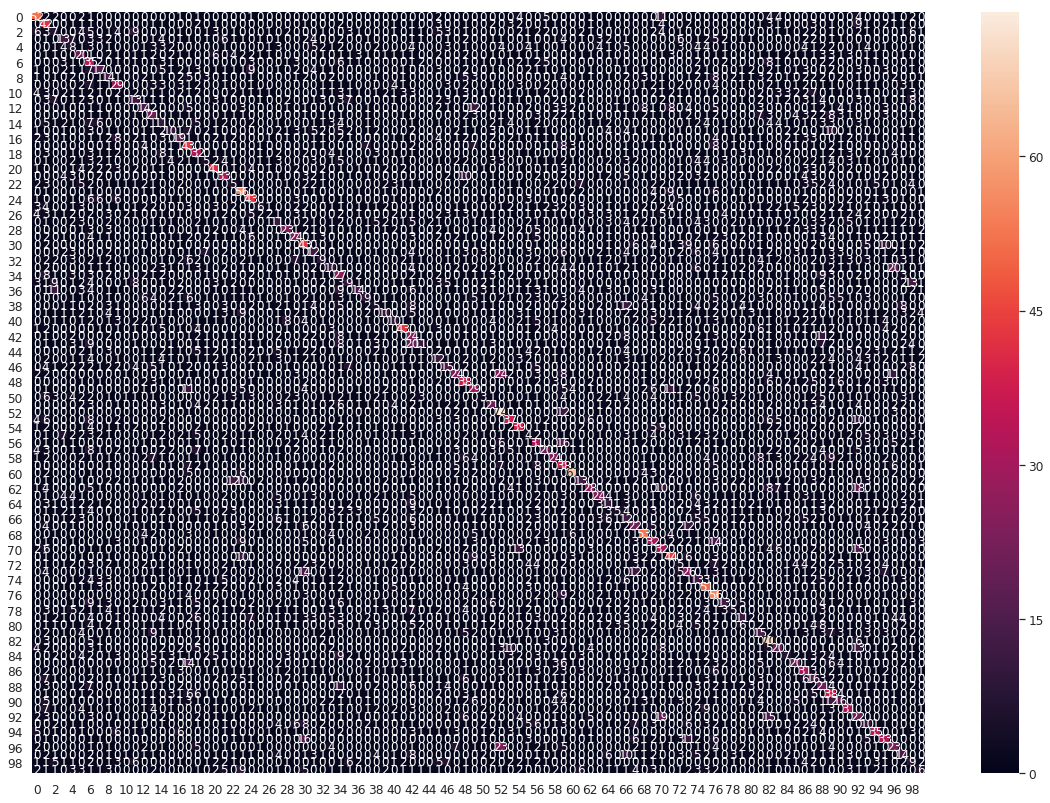

In [24]:
# Creamos la matriz de confusión
scnn_cm = confusion_matrix(np.argmax(y_test, axis=1), scnn_predicted)

# Visualiamos la matriz de confusión
scnn_df_cm = pd.DataFrame(scnn_cm, range(100), range(100))
plt.figure(figsize = (20,14))
sn.set(font_scale=1.1) # Tamaño fuente de las etiquetas
sn.heatmap(scnn_df_cm, annot=True, annot_kws={"size": 12}) # Tamaño fuente
plt.show()

Y por último, mostramos las métricas:

In [25]:
scnn_report = classification_report(np.argmax(y_test, axis=1), scnn_predicted)  
print(scnn_report)

              precision    recall  f1-score   support

           0       0.46      0.52      0.49       100
           1       0.20      0.42      0.27       100
           2       0.10      0.07      0.08       100
           3       0.21      0.13      0.16       100
           4       0.09      0.08      0.08       100
           5       0.18      0.20      0.19       100
           6       0.14      0.35      0.20       100
           7       0.24      0.17      0.20       100
           8       0.13      0.14      0.14       100
           9       0.29      0.29      0.29       100
          10       0.00      0.00      0.00       100
          11       0.18      0.13      0.15       100
          12       0.18      0.14      0.16       100
          13       0.18      0.21      0.19       100
          14       0.09      0.11      0.10       100
          15       0.18      0.10      0.13       100
          16       0.22      0.19      0.20       100
          17       0.27    

### Curva ROC (tasas de verdaderos positivos y falsos positivos)

Vamos a codificar la curva ROC para clasificación multiclase:

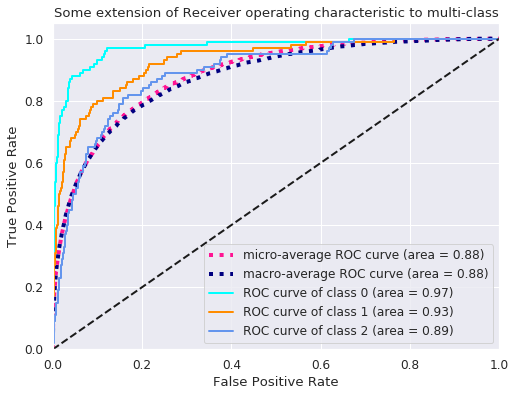

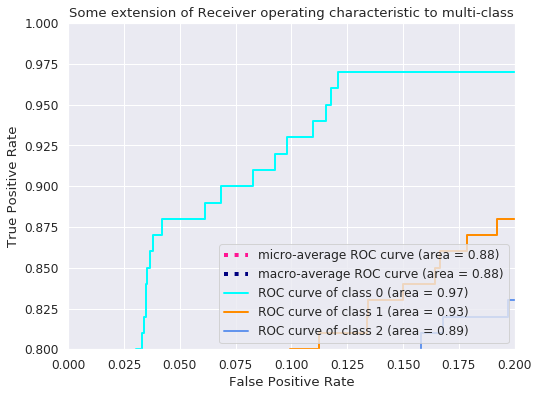

In [26]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize
from scipy import interp  
from itertools import cycle

n_classes = 100

from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()  
tpr = dict()  
roc_auc = dict()  
for i in range(n_classes):  
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], scnn_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), scnn_pred.ravel())  
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)  
for i in range(n_classes):  
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr  
tpr["macro"] = mean_tpr  
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)  
plt.plot(fpr["micro"], tpr["micro"],  
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],  
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])  
for i, color in zip(range(n_classes-97), colors):  
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)  
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.05])  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('Some extension of Receiver operating characteristic to multi-class')  
plt.legend(loc="lower right")  
plt.show()

# Zoom in view of the upper left corner.
plt.figure(2)  
plt.xlim(0, 0.2)  
plt.ylim(0.8, 1)  
plt.plot(fpr["micro"], tpr["micro"],  
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],  
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])  
for i, color in zip(range(3), colors):  
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('Some extension of Receiver operating characteristic to multi-class')  
plt.legend(loc="lower right")  
plt.show()

Vamos a ver algunos resultados:

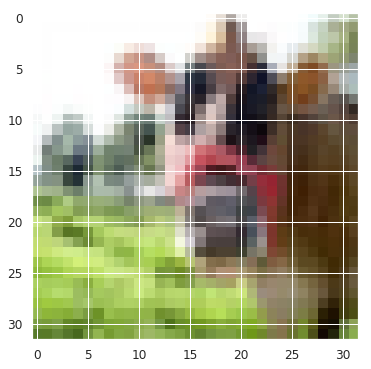

class for image: 49
predicted:         39


In [27]:
imgplot = plt.imshow(x_train_original[0])
plt.show()
print('class for image: ' + str(np.argmax(y_test[0])))  
print('predicted:         ' + str(scnn_predicted[0]))

In [28]:
imgplot = plt.imshow(x_train_original[1])
plt.show()
print('class for image: ' + str(np.argmax(y_test[1])))  
print('predicted:         ' + str(scnn_predicted[1]))

class for image: 33
predicted:         74


In [29]:
imgplot = plt.imshow(x_train_original[2])
plt.show()
print('class for image: ' + str(np.argmax(y_test[2])))  
print('predicted:         ' + str(scnn_predicted[2]))

class for image: 72
predicted:         6


In [30]:
imgplot = plt.imshow(x_train_original[3])
plt.show()
print('class for image: ' + str(np.argmax(y_test[3])))  
print('predicted:         ' + str(scnn_predicted[3]))

class for image: 51
predicted:         40


In [31]:
imgplot = plt.imshow(x_train_original[4])
plt.show()
print('class for image: ' + str(np.argmax(y_test[4])))  
print('predicted:         ' + str(scnn_predicted[4]))

class for image: 71
predicted:         71


Salvaremos los datos del histórico de entrenamiento para compararlos con otros modelos: